In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pprint
from boto.s3.connection import S3Connection
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import pylab as pl
import numpy as np


%matplotlib inline

# Limit rows disp# Limit rows displayed in notebook
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 2)

In [3]:
import json

def readJson(filename):
    f = open(filename,'r')
    jsonList = f.readlines()
    f.close()
    return [json.loads(s) for s in jsonList]

business = readJson('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json')

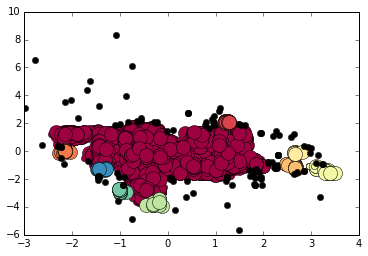

In [17]:
''' DBSCAN : Okayish results '''

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import pylab as pl
import numpy as np

X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples = db.core_sample_indices_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = pl.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    
    if k == -1:
        col = 'k'
        markersize = 6
    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                            if labels[index] == k]
    
    for index in class_members:
        x = X[index]
        if index in core_samples and k != -1:
            markersize = 14
        else:
            markersize = 6
        pl.plot(x[0], x[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=markersize)

In [ ]:
''' K Means with results '''

from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,kmeans2, vq

for k in range(3,8):
    centroids,_ = kmeans(X,k)
    # assign each sample to a cluster
    idx,_ = vq(X,centroids)
    colors = pl.cm.Spectral(np.linspace(0, 1, k))
    for i in range(k):
        plot(X[idx==i,0],X[idx==i,1], 'o', markerfacecolor=colors[i])
    plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
    plot.title("K Means for %d", k)
    show()